1. csv 데이터 불러오기

2. 각 데이터 Column별 분포 그려보기


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
csv_data = r"insurance_with_null.csv"
df = pd.read_csv(csv_data)
print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]


c:\Users\LYJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\LYJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\LYJ\AppData\Local\Temp\ipykernel_2368\964876097.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


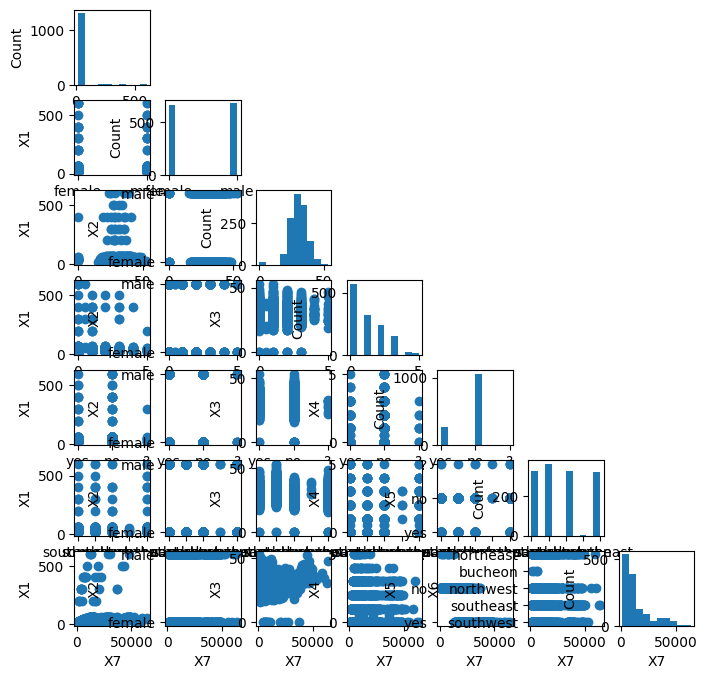

In [6]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values)
plt.tight_layout()
plt.show()

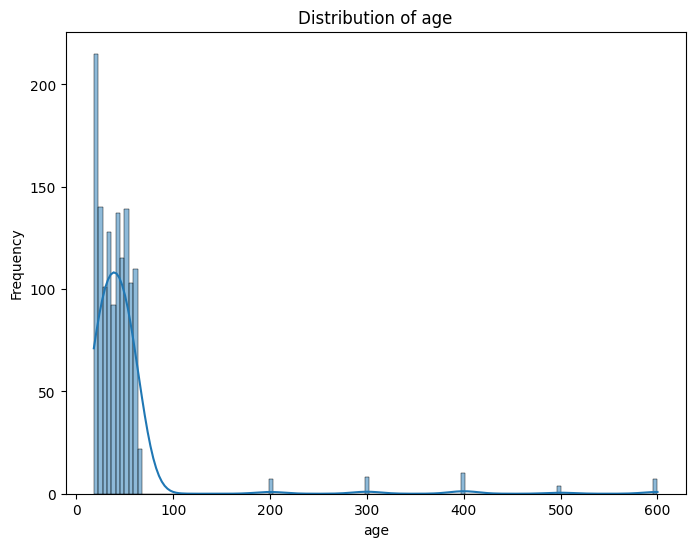

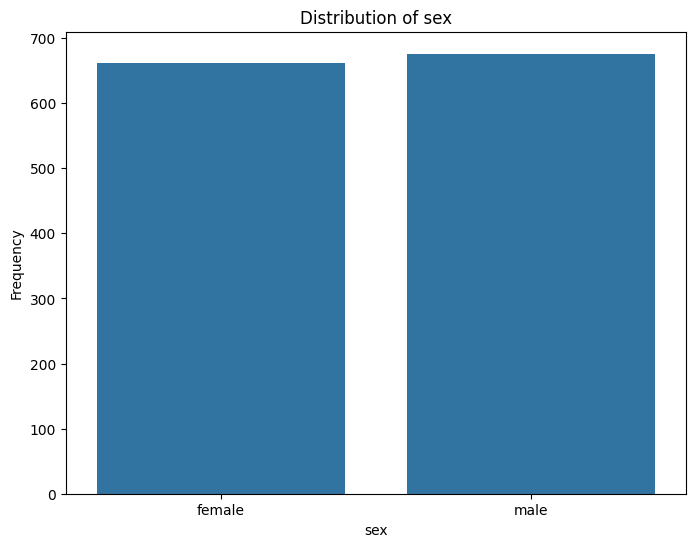

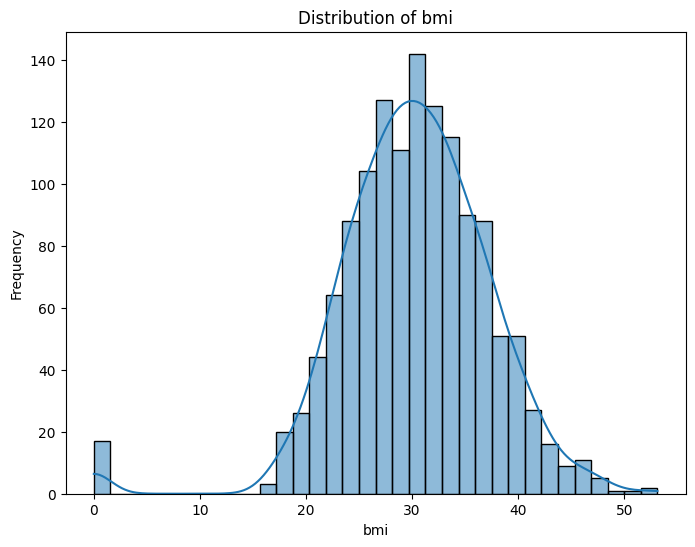

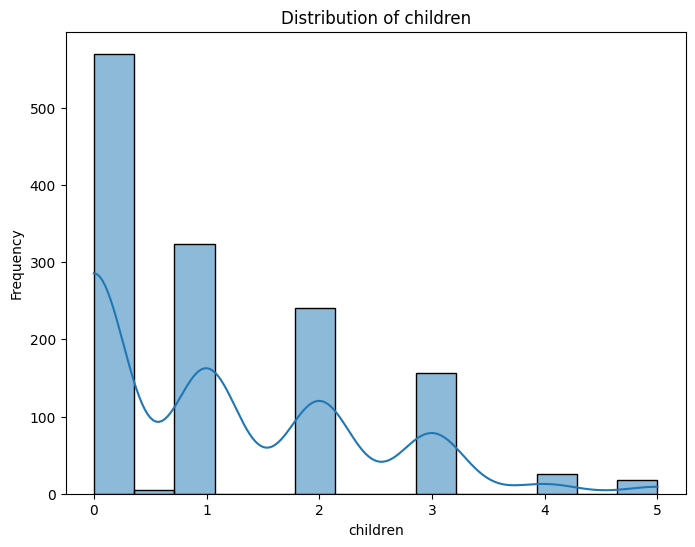

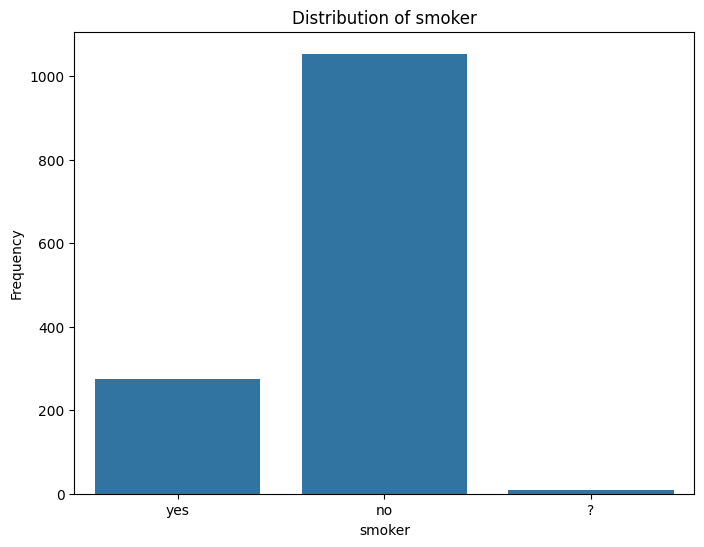

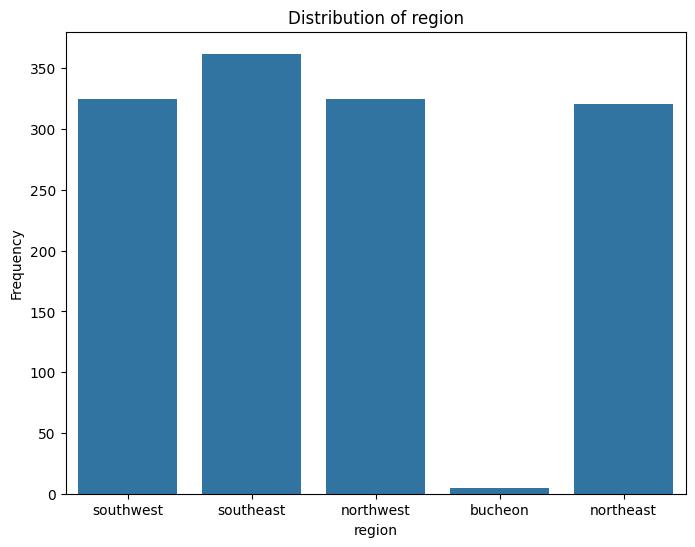

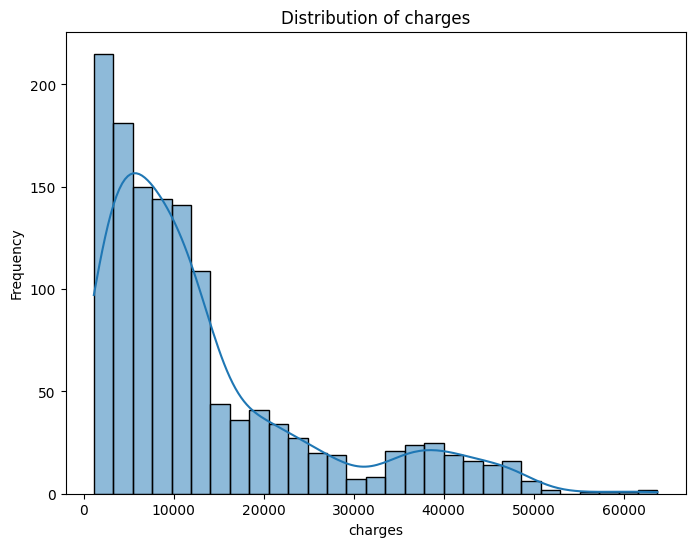

In [7]:
import seaborn as sns

# Assuming df is already loaded as in the previous code

for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    if df[column].dtype in ['int64', 'float64']:  # Numerical columns
        sns.histplot(df[column], kde=True)  # Histogram with KDE
        plt.title(f'Distribution of {column}')
    else:  # Categorical columns
        sns.countplot(x=column, data=df)  # Countplot
        plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

 모든 열에 대해 히스토그램 그리기
for column in df.columns:
    plt.figure(figsize=(5, 6))
    try:
        df[column].hist(bins=30)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    except Exception as e:
        print(f"Cannot plot histogram for {column}: {e}")


classification 만들기 위해서 데이터를 가져와서 어떤 값들로 채워야하는지 각자 설계해야 된다


3. smoker의 ?와 region의 bucheon 찾아서 지우기 (Optional: bucheon을 southwest로 바꾸기)

In [8]:
# 데이터셋에서 에러값이 발생한 smoker의 ?와, religon의 부천 날리기 
df = df[df['smoker'] != '?']
df = df[df['region'] != 'bucheon']
print(df)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1324 rows x 7 columns]


4. smoker를 label encoding 한 이후 y 값에 넣어주기

In [9]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['smoker'].values)
print(y)

[1 0 0 ... 0 0 1]


5. smoker 제외 나머지 feature를 One hot encoding 한 이후 X 값에 넣어주기

ex) sex, region은 onehot 인코딩 해야 한다. 빨강이 파랑보다 클수 없음
ex) 나머지 값들도 범주형데이터를 이진화함

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X=df[['age','sex','bmi','children','region','charges']].values

ohe=OneHotEncoder(categories='auto',drop='first')
c_tranf=ColumnTransformer([('onehot',ohe,[1,4])],remainder='passthrough')
X=c_tranf.fit_transform(X)
print(X.shape,'\n',X)


(1324, 8) 
 [[0.0 0.0 0.0 ... 27.9 0.0 16884.924]
 [1.0 0.0 1.0 ... 33.77 1.0 1725.5523]
 [1.0 0.0 1.0 ... 33.0 3.0 4449.462]
 ...
 [0.0 0.0 1.0 ... 36.85 0.0 1629.8335]
 [0.0 0.0 0.0 ... 25.8 0.0 2007.945]
 [0.0 1.0 0.0 ... 29.07 0.0 29141.3603]]


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X=df[['age','sex','bmi','children','region','charges']].values
c_transf = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['sex', 'region'])  # sex와 region을 원-핫 인코딩
    ],
    remainder='passthrough' )

X = c_transf.fit_transform(X)
print(X.shape,'\n',X)

6. X 값 Imputing

In [11]:
from sklearn.impute import SimpleImputer
import numpy as np
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
imr=imr.fit(X)
X=imr.transform(X)


--과제--

age - replace 'x00' to 'x0'

bmi - replace '0' to mean

childern - replace '0.5' to mode

charges - replace 'nan' to median

In [12]:
df['age'] = df['age'].astype(str).str.replace('00', '0')

bmi_mean = df['bmi'].mean()
df['bmi'] = df['bmi'].replace(0, bmi_mean)

children_mode = df['children'].mode()[0]
df['children'] = df['children'].replace(0.5, children_mode)

charges_median = df['charges'].median()
df['charges'] = df['charges'].fillna(charges_median)

print(df.head())


  age     sex     bmi  children smoker     region      charges
0  19  female  27.900       0.0    yes  southwest  16884.92400
1  18    male  33.770       1.0     no  southeast   1725.55230
2  28    male  33.000       3.0     no  southeast   4449.46200
3  33    male  22.705       0.0     no  northwest  21984.47061
4  32    male  28.880       0.0     no  northwest   3866.85520


7. train-test split (7:3)

meaning of data y...?? 

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


8. logistic regression (L1 regularization) 학습 및 평가

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',C=1.0,solver='liblinear')
lr.fit(X_train_std,y_train)
print("Logistic Regression Score:", lr.score(X_test_std, y_test))

Logistic Regression Score: 0.907035175879397


9. LR의 coefficient 출력

In [16]:
print("Logistic Regression Coefficients:", lr.coef_)

Logistic Regression Coefficients: [[ 0.18896802 -0.22988531  0.         -0.02491444 -0.20282486 -0.9891264
  -0.09218324  3.37703695]]


10. Decision Tree / Random forest 학습, 평가, feature importance 출력

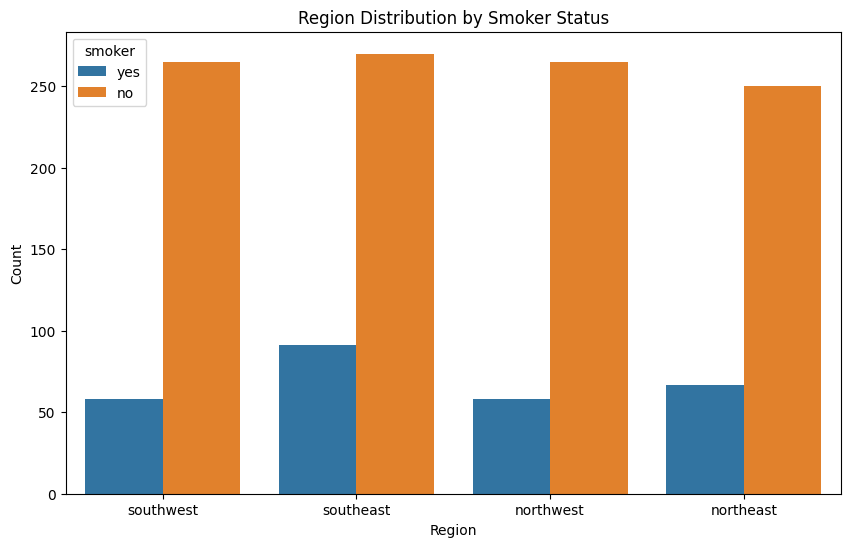

In [17]:
# prompt: smoker 여부 별로 region 분포 시각화

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Assuming 'df' is your DataFrame and it's already preprocessed

# Create the visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=df)
plt.title('Region Distribution by Smoker Status')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

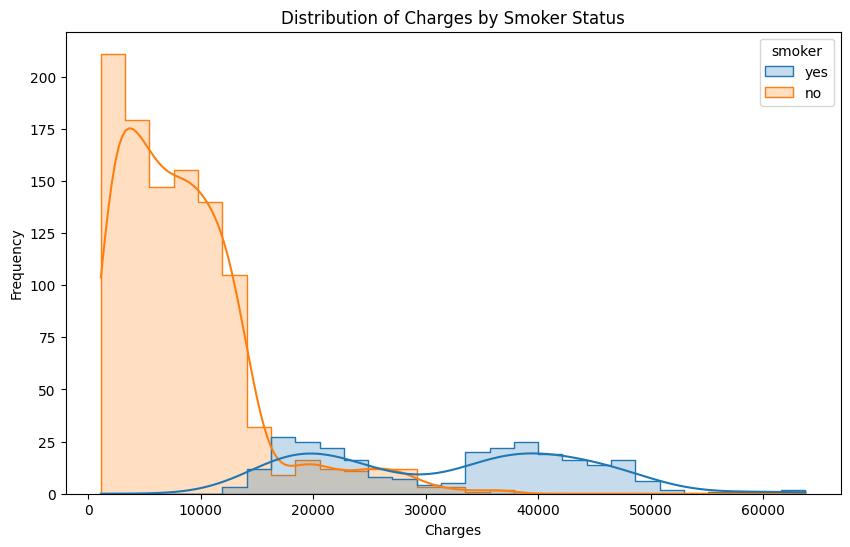

In [18]:
# prompt: smoker 여부 별로 charge 분포 시각화

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='smoker', kde=True, element="step")
plt.title('Distribution of Charges by Smoker Status')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

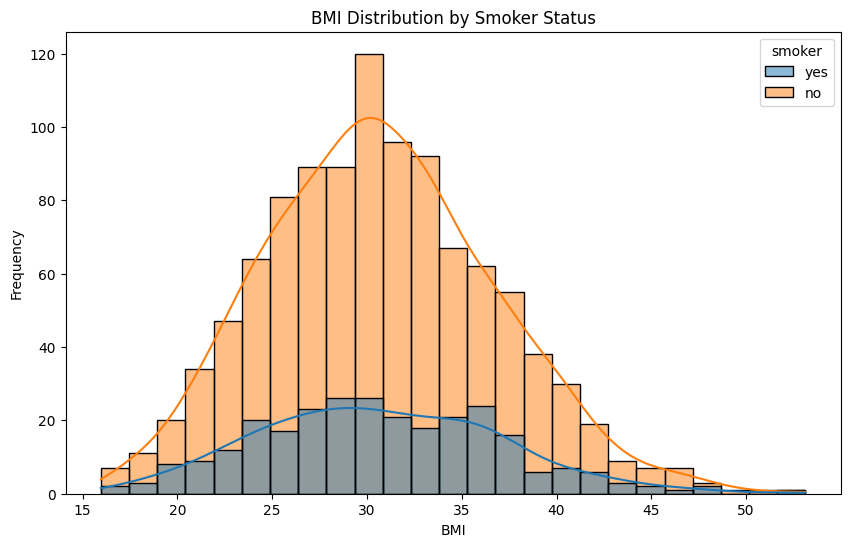

In [19]:
# prompt: smoker 여부 별로 bmi 분포 시각화

# ... (your existing code) ...

# Visualize BMI distribution by smoker status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='smoker', kde=True)
plt.title('BMI Distribution by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
tree.fit(X_train,y_train)
print(tree.score(X_test_std,y_test))

0.7939698492462312


In [21]:
importances=tree.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.01175728,
       0.11897885, 0.        , 0.86926387])